In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("salary_data_cleaned.csv")

In [3]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,python_des,aws_des,spark_des,azure_des,hadoop_des,scikit-learn_des,pytorch_des,tensorflow_des,keras_des,google cloud_des
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,1,0,0,0,0,0,0,0,0,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,1,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,1,0,1,0,0,0,0,0,0,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,1,0,0,0,0,0,0,0,0,0
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,1,0,0,0,0,0,0,0,0,0


In [5]:
df["Job Title"].unique()


array(['Data Scientist', 'Healthcare Data Scientist',
       'Research Scientist', 'Staff Data Scientist - Technology',
       'Data Analyst', 'Data Engineer I', 'Scientist I/II, Biology',
       'Customer Data Scientist',
       'Data Scientist - Health Data Analytics',
       'Senior Data Scientist / Machine Learning',
       'Data Scientist - Quantitative', 'Digital Health Data Scientist',
       'Associate Data Analyst', 'Clinical Data Scientist',
       'Data Scientist / Machine Learning Expert', 'Web Data Analyst',
       'Senior Data Scientist', 'Data Engineer',
       'Data Scientist - Algorithms & Inference', 'Scientist',
       'Lead Data Scientist', 'Spectral Scientist/Engineer',
       'College Hire - Data Scientist - Open to December 2019 Graduates',
       'Data Scientist, Office of Data Science', 'Data Science Analyst',
       'Senior Risk Data Scientist',
       'Data Scientist in Artificial Intelligence Early Career',
       'Data Scientist - Research', 'R&D Data Analy

In [6]:
# job titles data scientist , research scientist , data engineer , analyst
# machine learning , manager , director
    

In [143]:
def job_simplifier(x):
    x = x.lower()
    if "data scientist" in x:
        return "data scientist"
    elif "researh scientist" in x:
        return "research scientist"
    elif "data engineer" in x:
        return "data engineer"
    elif "analyst" in x:
        return "analyst"
    elif "machine learning" in x:
        return "machine learning engineer"
    elif "manager" in x:
        return "manager"
    elif "director" in x:
        return "director"
    else:
        return "na"
    
    

In [144]:
df["job_simp"] = df["Job Title"].apply(job_simplifier)

In [145]:
df["job_simp"].value_counts()

data scientist               279
na                           184
data engineer                119
analyst                      102
manager                       22
machine learning engineer     22
director                      14
Name: job_simp, dtype: int64

In [15]:
#df = df.drop("Unnamed: 0" , axis=1)

In [17]:
def seniority(x):
    x = x.lower()
    if "sr" in x or "senior" in x or "lead" in x or "principal" in x or "sr." in x:
        return "senior"
    elif "jr" in x or "jr." in x or "junior" in x:
        return "junior"
    else:
        return "na"
    

In [18]:
df["seniority"] = df["Job Title"].apply(seniority)

In [20]:
df["seniority"].value_counts()

na        519
senior    220
junior      3
Name: seniority, dtype: int64

In [22]:
#los angeles as state issue
df["job_state"]= df["job_state"].apply(lambda x : x if x.lower() != "los angeles" else "CA")

In [31]:
#job description length
df["desc_len"] = df["Job Description"].apply(lambda x : len(x))

In [32]:
#competitor count
df[""]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,azure_des,hadoop_des,scikit-learn_des,pytorch_des,tensorflow_des,keras_des,google cloud_des,job_simp,seniority,desc_len
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,0,0,0,0,0,0,0,data scientist,na,2536
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,0,0,0,0,0,0,0,data scientist,na,4783
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,0,0,0,0,0,0,0,data scientist,na,3461
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,0,0,0,0,0,0,0,data scientist,na,3883
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,0,0,0,0,0,0,0,data scientist,na,2728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,...,0,0,0,0,0,0,0,na,senior,6162
738,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,...,0,1,0,0,0,0,0,data engineer,senior,6130
739,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,...,0,0,0,0,0,0,0,na,na,3078
740,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,...,0,0,0,0,0,0,0,manager,na,1642


In [37]:
df["comp_num"] = df["Competitors"].apply( lambda x : len(x.split(",")) if x != "-1" else -1)


In [41]:
df["avg_salary"]

0       72.0
1       87.5
2       85.0
3       76.5
4      114.5
       ...  
737     84.5
738    102.5
739     73.5
740    127.5
741     93.5
Name: avg_salary, Length: 742, dtype: float64

In [46]:
#hourly wage to annual
df["min_salary"] = df.apply(lambda x : x.min_salary*2 if x.hourly==1 else x.min_salary , axis=1)
df["max_salary"] = df.apply(lambda x : x.max_salary*2 if x.hourly==1 else x.max_salary , axis=1)
df["avg_salary"] = df.apply(lambda x : x.avg_salary*2 if x.hourly==1 else x.avg_salary , axis=1)

In [48]:
#df[df.hourly == 1].avg_salary.value_counts(ascending=False)

In [61]:
#remove new line from job title
df["company_txt"] = df["company_txt"].apply(lambda x : x.replace("\n",""))

In [62]:
df.company_txt

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

In [64]:
df.describe()

,Rating,Founded,hourly,employer_pro,min_salary,max_salary,avg_salary,same_city,same_state,age,...,spark_des,azure_des,hadoop_des,scikit-learn_des,pytorch_des,tensorflow_des,keras_des,google cloud_des,desc_len,comp_num
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,...,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,101.434636,0.557951,0.680593,49.389488,...,0.225067,0.072776,0.167116,0.059299,0.052561,0.095687,0.039084,0.035040,3869.545822,0.433962
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,37.546122,0.496965,0.466561,53.962906,...,0.417908,0.259944,0.373331,0.236343,0.223305,0.294360,0.193925,0.184006,1521.495868,1.860254
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,15.500000,0.000000,0.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,-1.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,0.000000,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,-1.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,1.000000,27.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3731.000000,-1.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,1.000000,62.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,1.000000,279.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [68]:
df.corr()["avg_salary"]

C:\Users\faruk\AppData\Local\Temp\ipykernel_7100\3749419789.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["avg_salary"]


Rating              0.012517
Founded            -0.009947
hourly             -0.250626
employer_pro        0.094734
min_salary          0.978714
max_salary          0.990066
avg_salary          1.000000
same_city          -0.040823
same_state         -0.031470
age                 0.021817
python_des          0.316423
aws_des             0.172602
spark_des           0.171104
azure_des           0.019224
hadoop_des          0.110969
scikit-learn_des    0.161263
pytorch_des         0.044996
tensorflow_des      0.161686
keras_des           0.115729
google cloud_des    0.071044
desc_len            0.070474
comp_num            0.085393
Name: avg_salary, dtype: float64

In [69]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_pro', 'Salary', 'min_salary', 'max_salary',
       'avg_salary', 'company_txt', 'job_city', 'job_state', 'hq_city',
       'hq_state', 'same_city', 'same_state', 'age', 'python_des', 'aws_des',
       'spark_des', 'azure_des', 'hadoop_des', 'scikit-learn_des',
       'pytorch_des', 'tensorflow_des', 'keras_des', 'google cloud_des',
       'job_simp', 'seniority', 'desc_len', 'comp_num'],
      dtype='object')

<AxesSubplot: xlabel='desc_len', ylabel='avg_salary'>

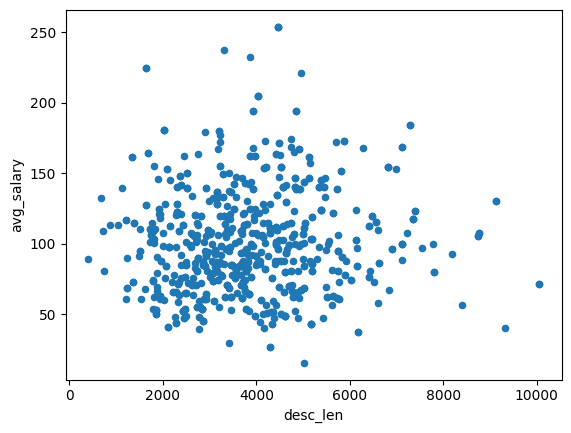

In [71]:
df.plot("desc_len" , "avg_salary", kind="scatter")

Text(0, 0.5, 'age of company')

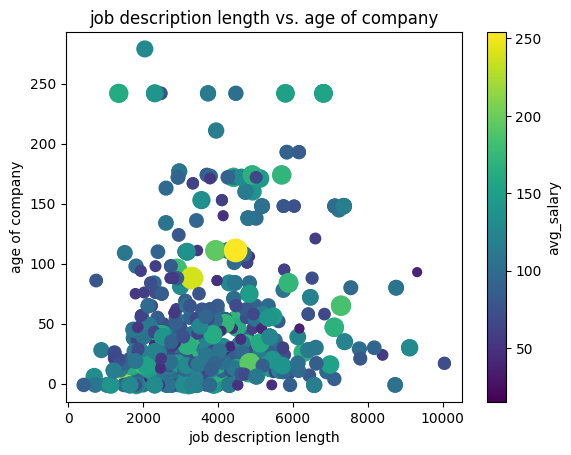

In [75]:
df.plot("desc_len","age", kind="scatter" , s="avg_salary" , c="avg_salary")
plt.title("job description length vs. age of company")
plt.xlabel("job description length")
plt.ylabel("age of company")



<AxesSubplot: >

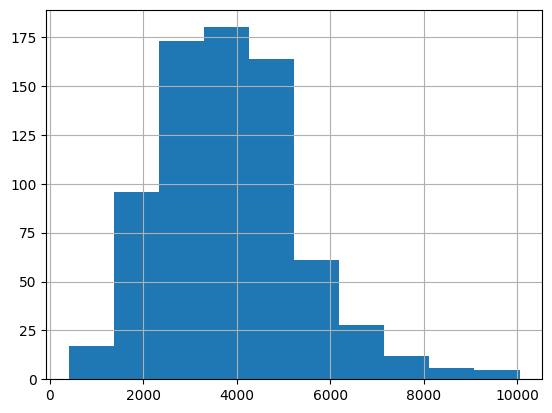

In [76]:
df.desc_len.hist()

<AxesSubplot: >

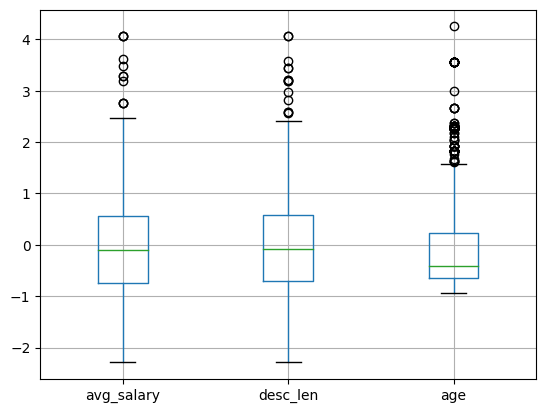

In [87]:
numeric_only_df= df.select_dtypes(include=['float64', 'int64'])
normalized_df=(numeric_only_df-numeric_only_df.mean())/numeric_only_df.std()

normalized_df.boxplot(column=["avg_salary" , "desc_len" , "age"])

In [94]:
table1 =pd.pivot_table(df, index=["job_state", "job_city"] , values="avg_salary" ) 

In [96]:
table1.sort_values("job_state", ascending=False)

avg_salary
job_state job_city              
WI        Sheboygan   100.500000
          Milwaukee    54.500000
          Madison     120.000000
          Green Bay    60.000000
WA        Vancouver   112.750000
...                          ...
AZ        Chandler    100.000000
          Scottsdale   60.500000
AL        Huntsville   59.833333
          Birmingham   65.000000
          Alabaster    39.500000

[200 rows x 1 columns]

C:\Users\faruk\AppData\Local\Temp\ipykernel_7100\546248816.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr_plot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


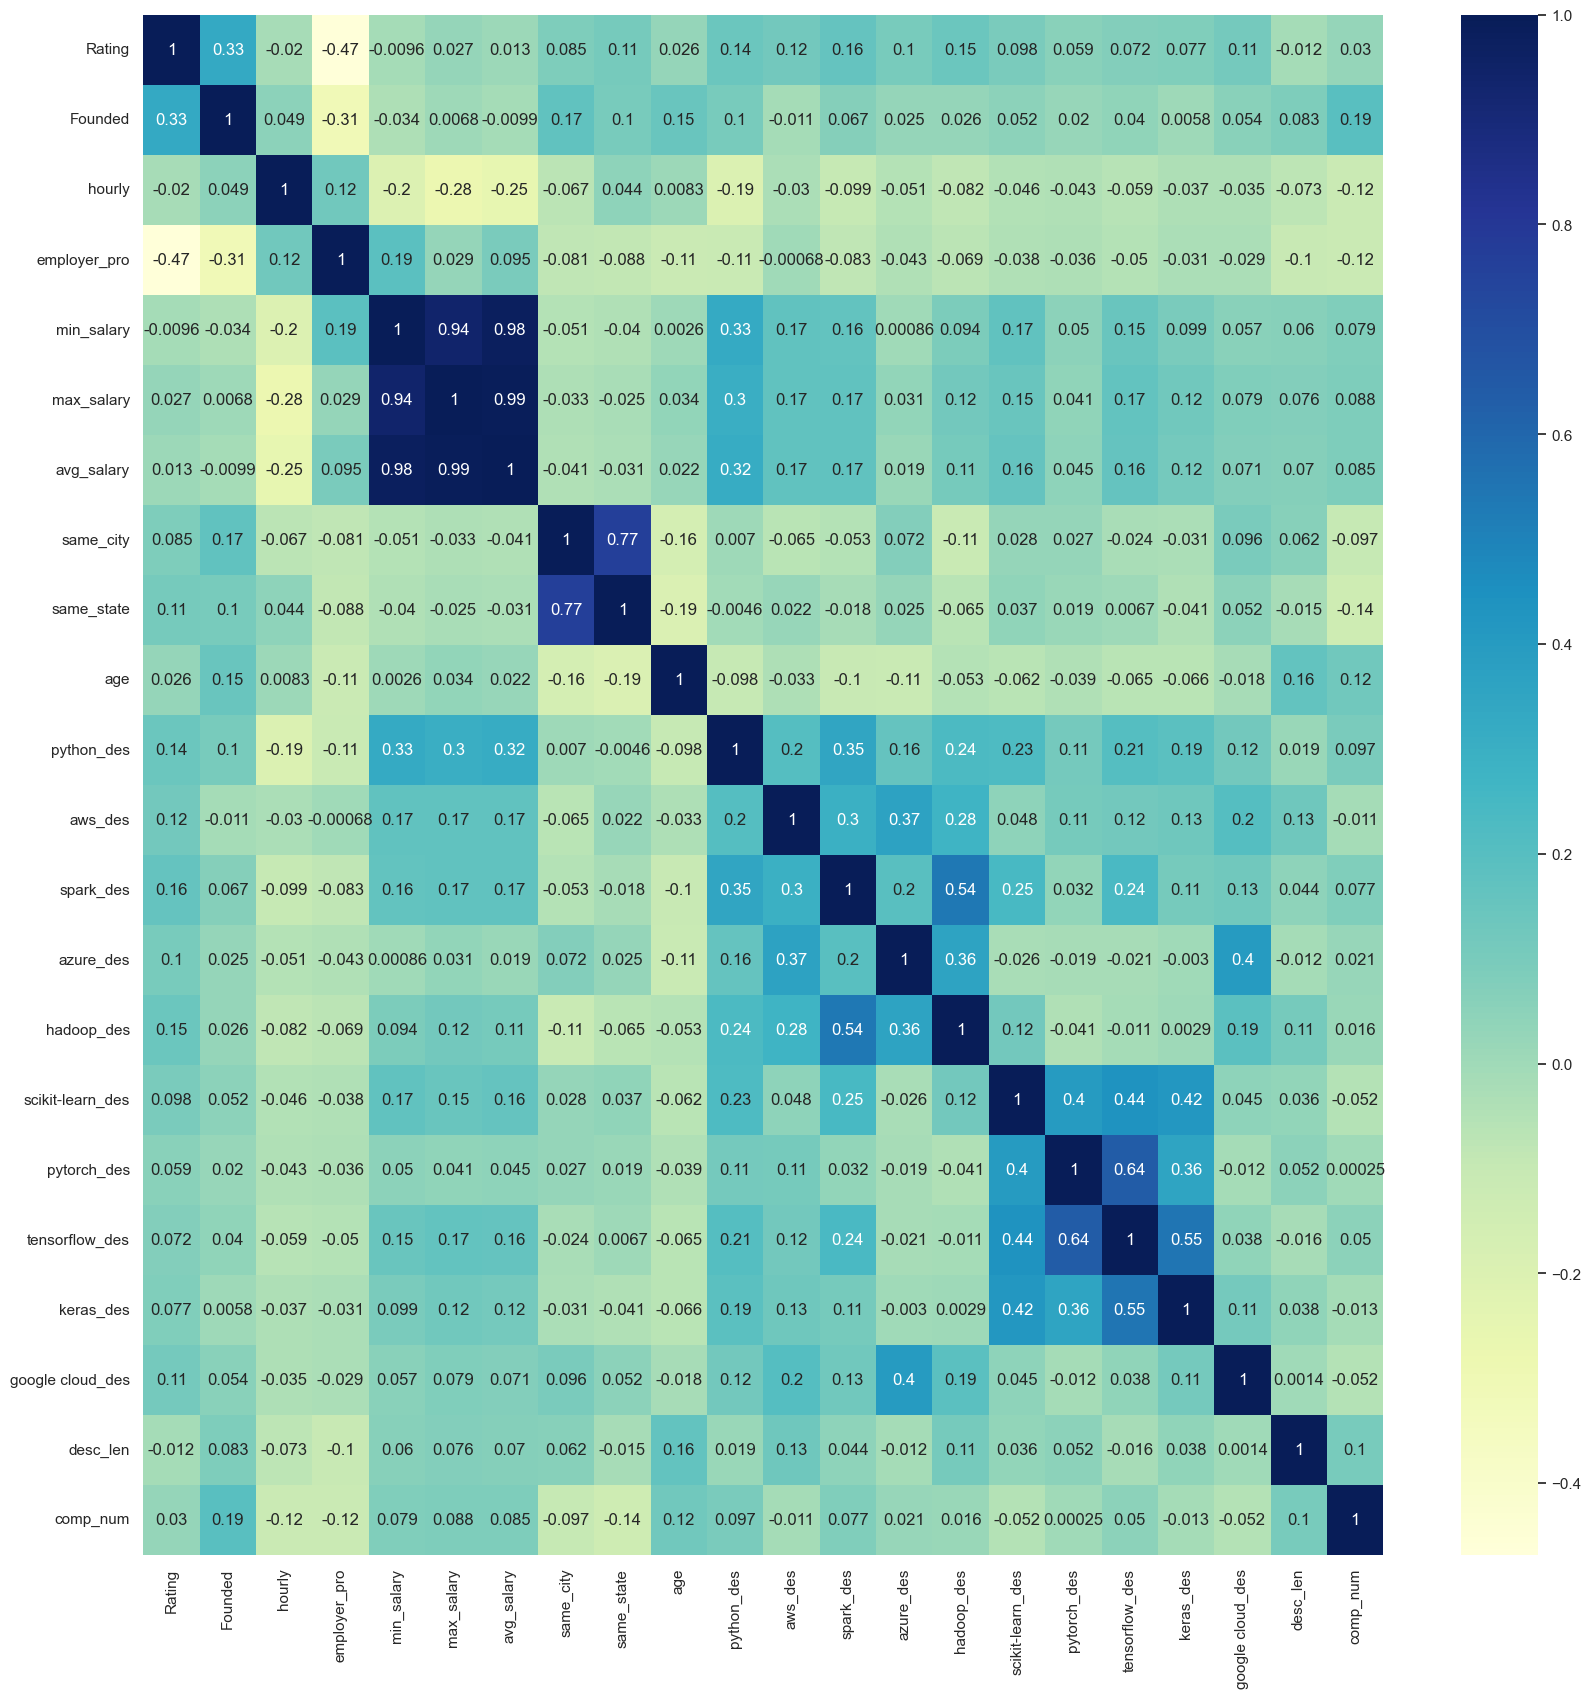

In [105]:
df_corr_plot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
sns.set(rc={'figure.figsize':(25,25)})
plt.show()

In [99]:
data_corr = df[["age","avg_salary","Rating","desc_len","python_des"]].corr()

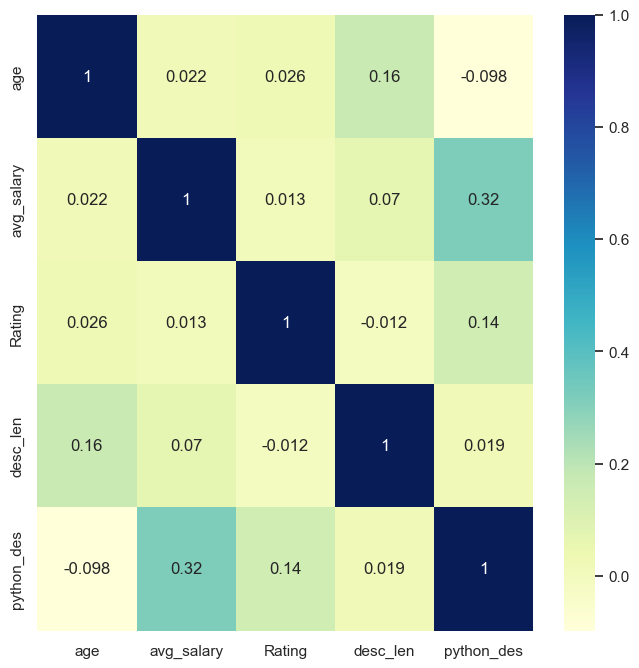

In [125]:
sns.set(rc={'figure.figsize':(8,8)})
dataplot = sns.heatmap(data_corr, cmap="YlGnBu", annot=True)
plt.show()

In [111]:
df_cat = df[["Location","hq_city","hq_state","Size","Type of ownership", "Industry",
             "Sector","Revenue" ,"company_txt", "job_state" , "job_city" , "spark_des",
            "python_des","hadoop_des","azure_des","google cloud_des","aws_des","job_simp","seniority"]
           ]

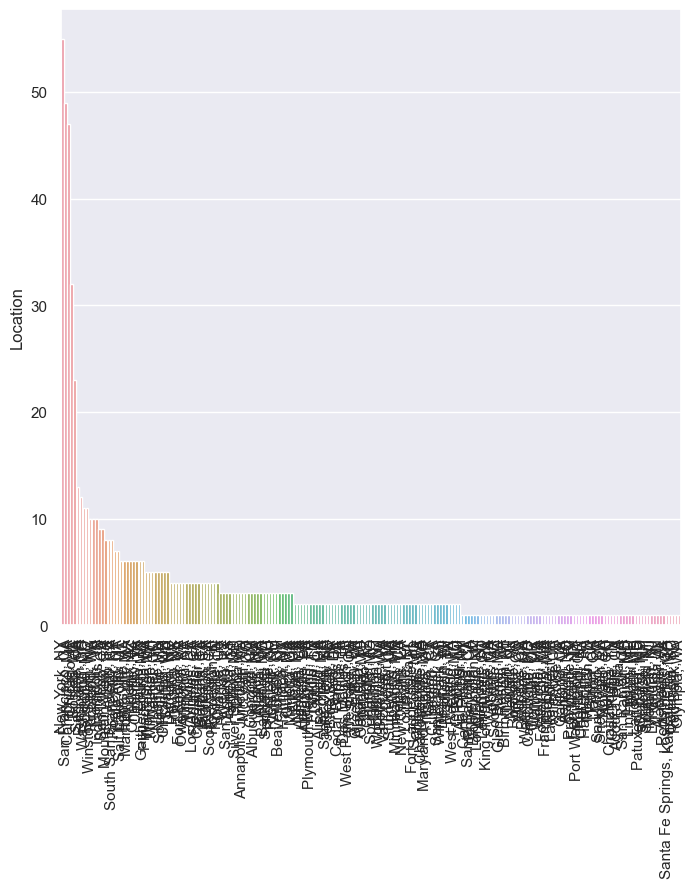

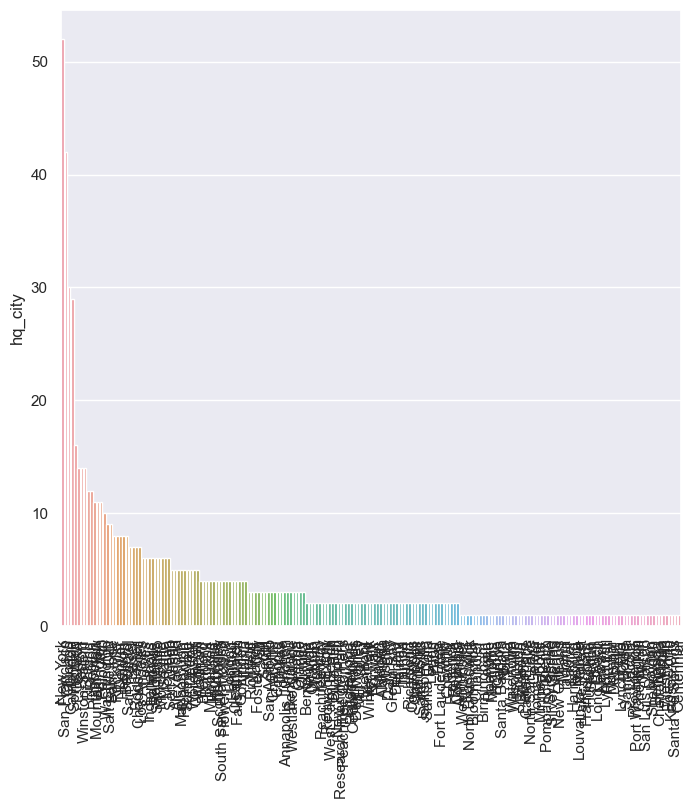

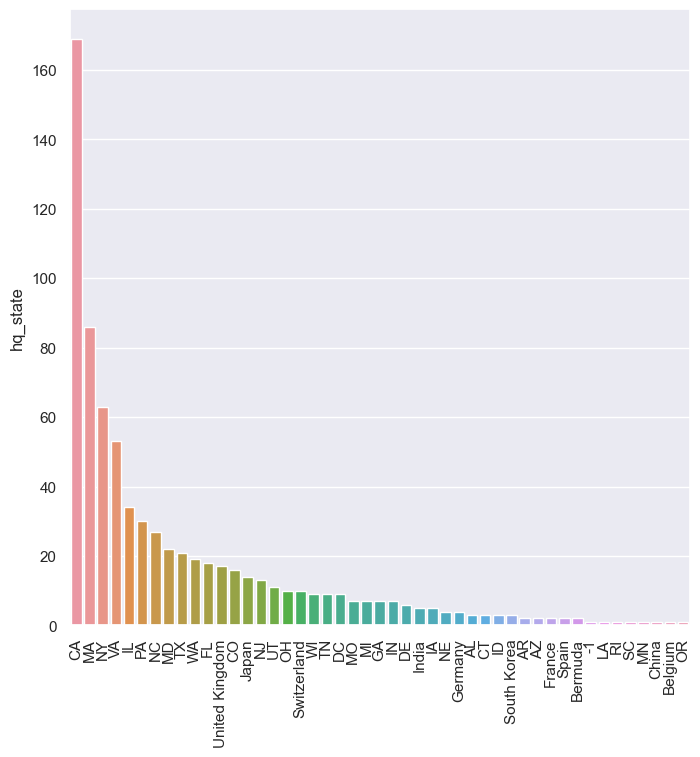

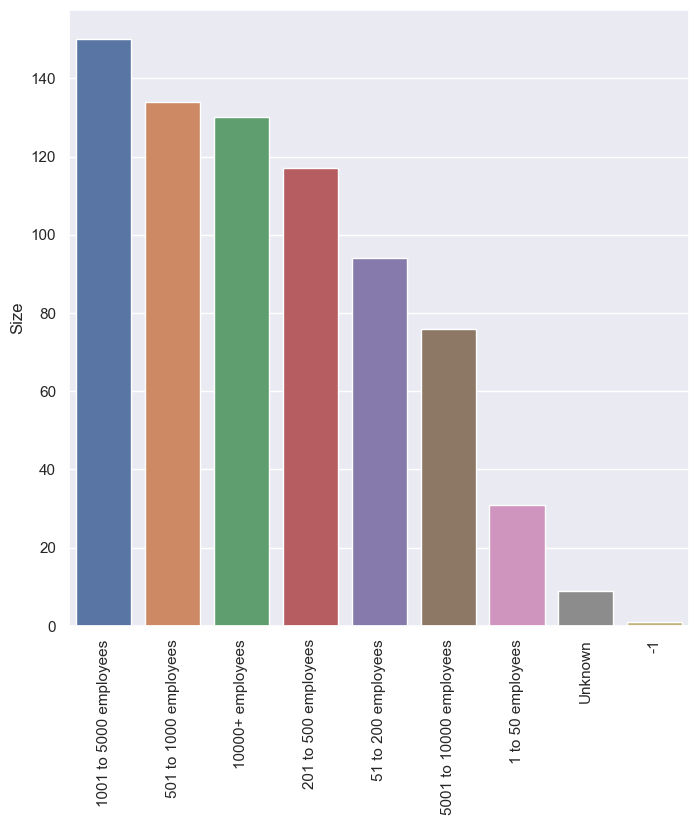

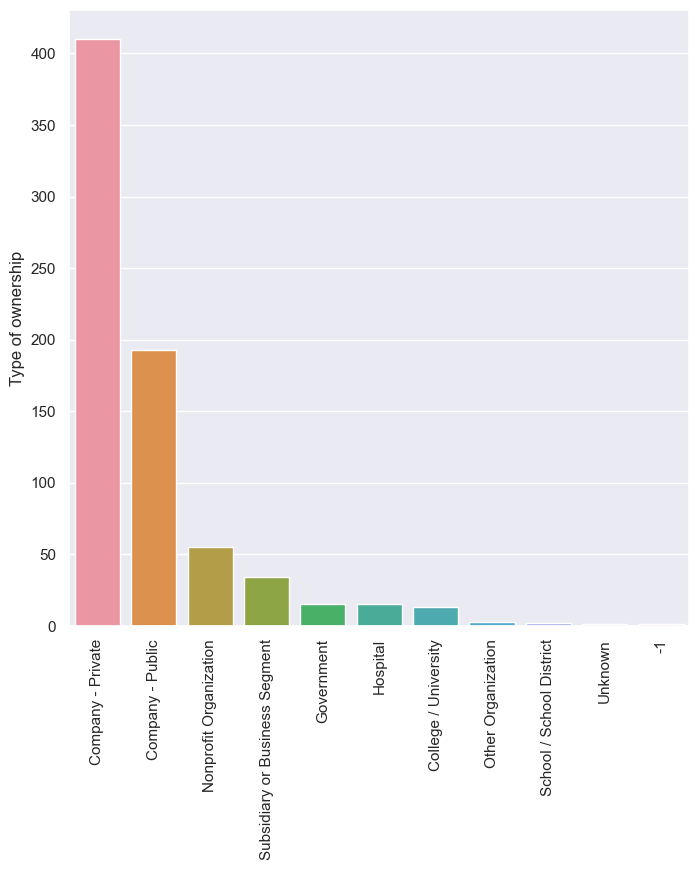

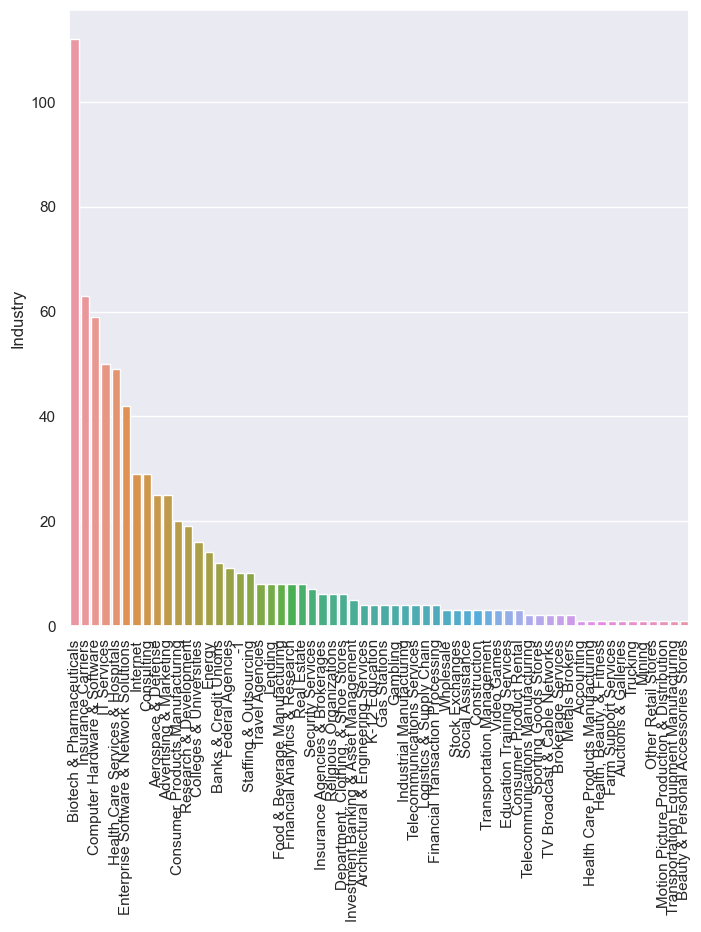

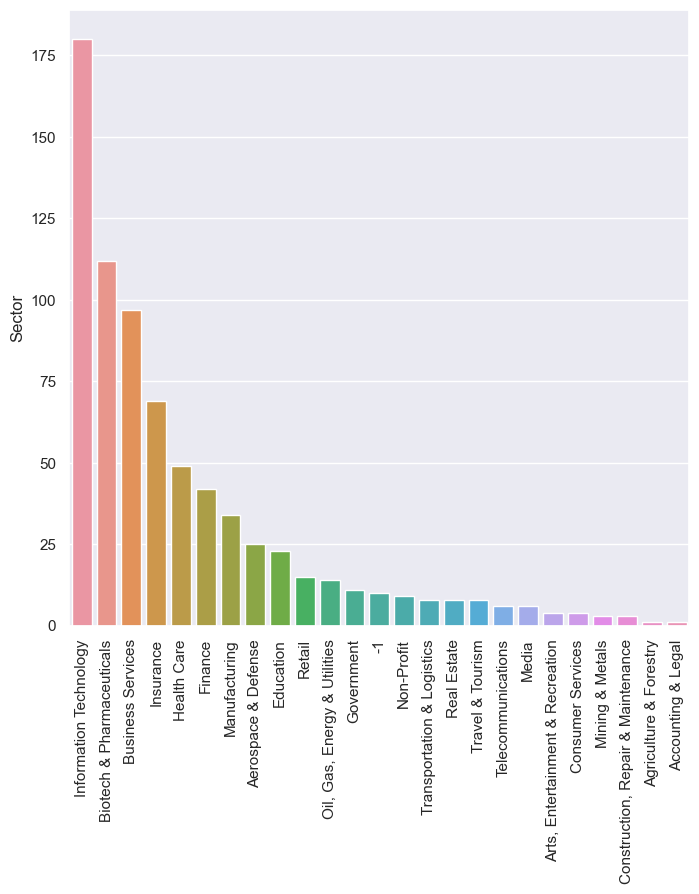

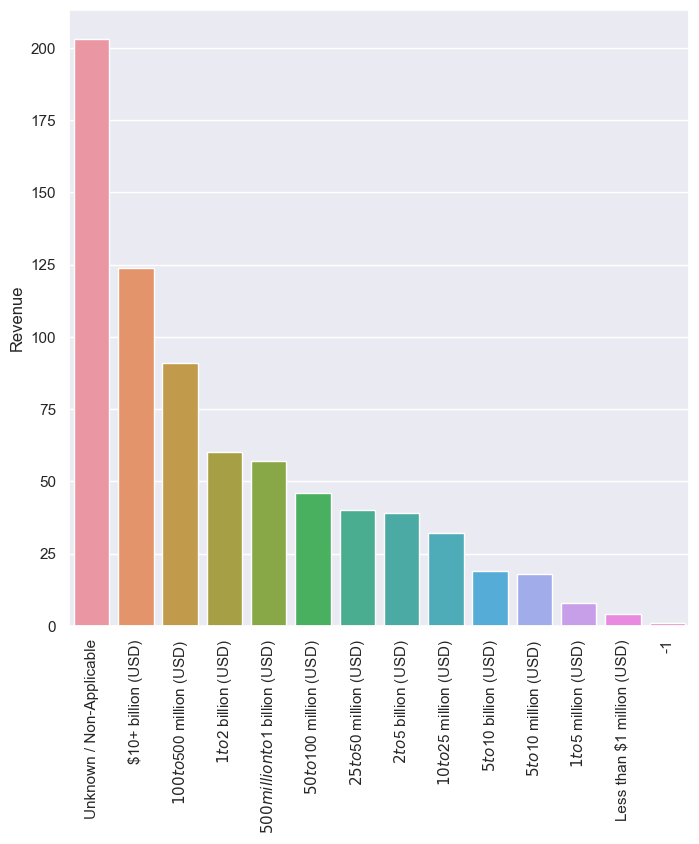

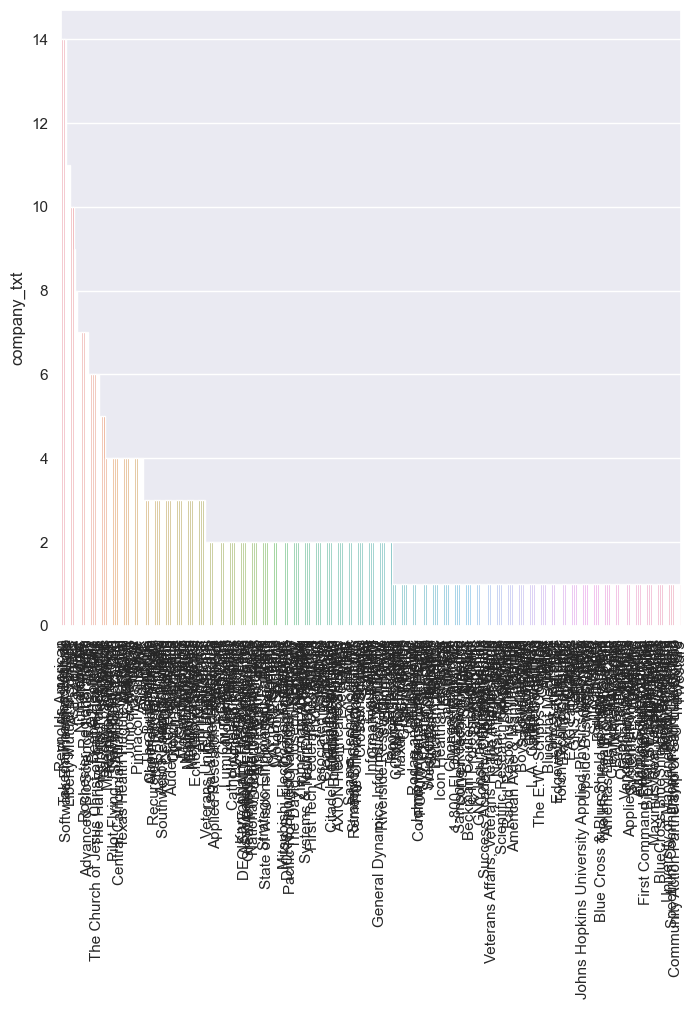

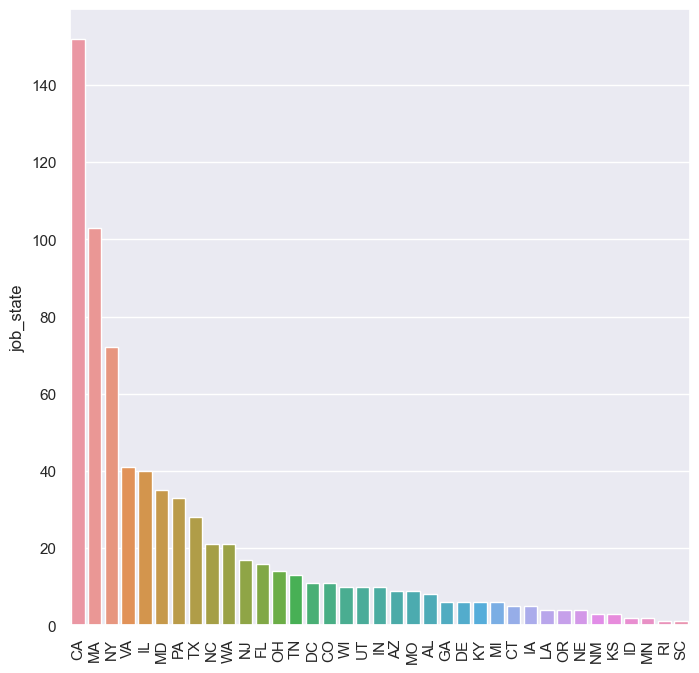

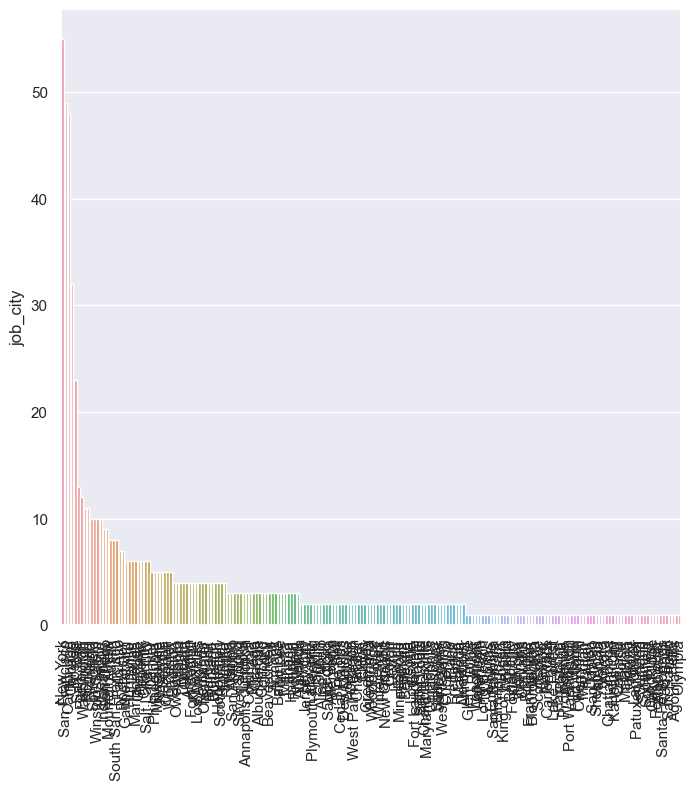

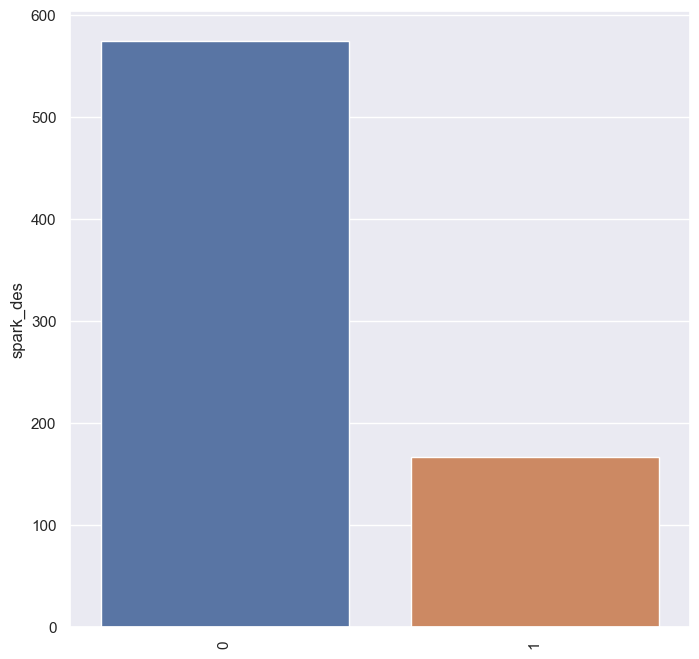

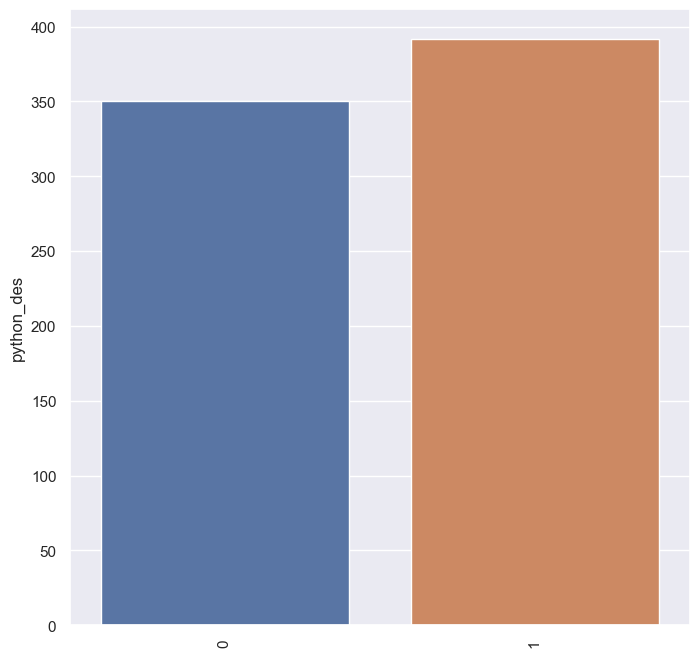

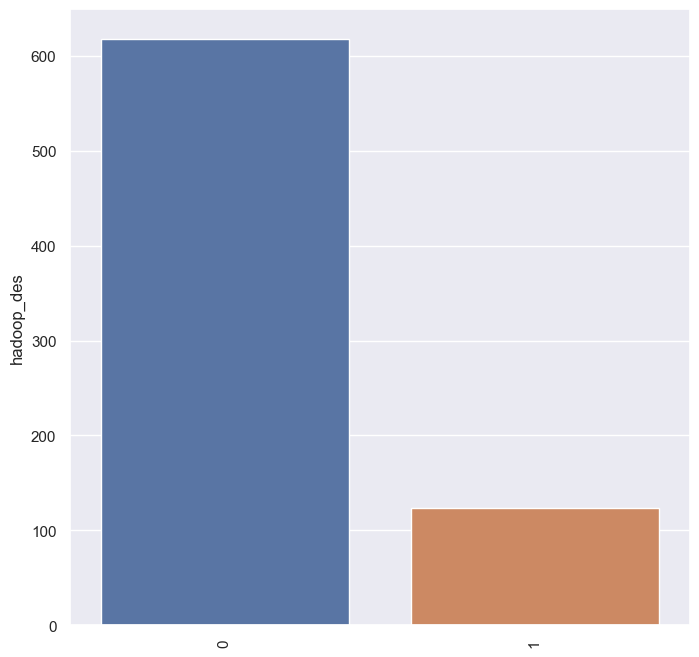

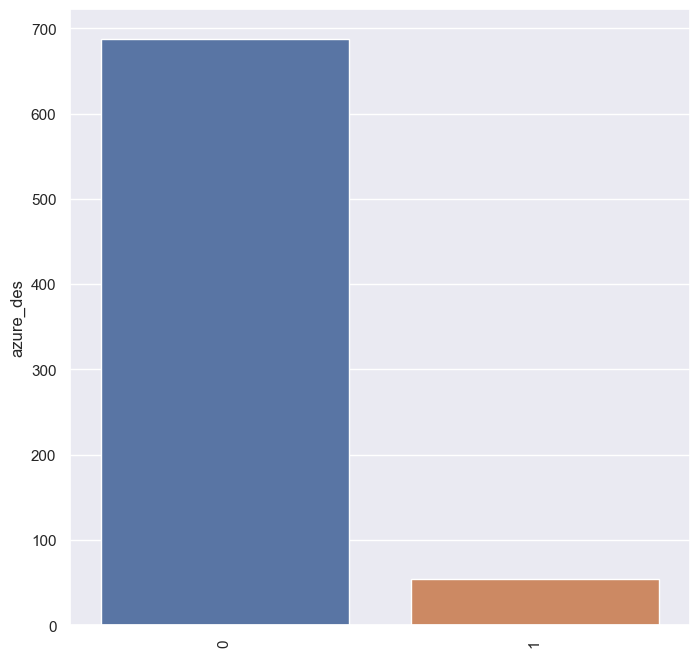

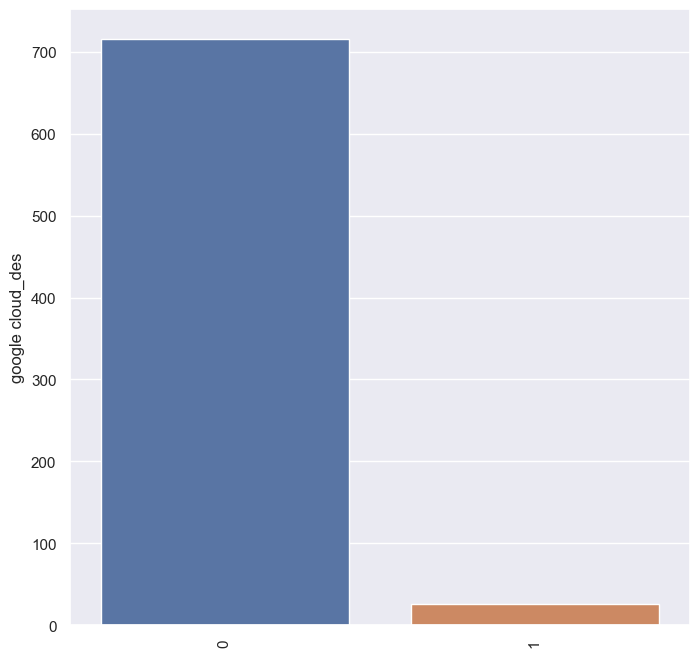

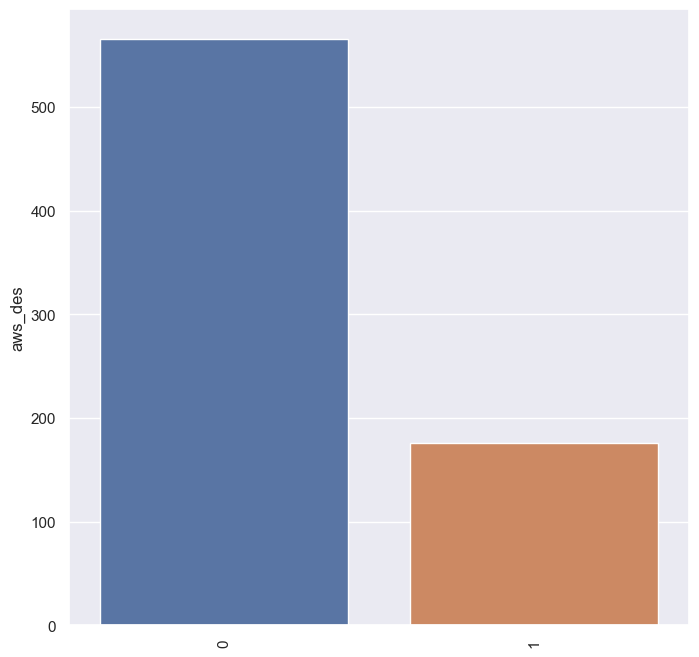

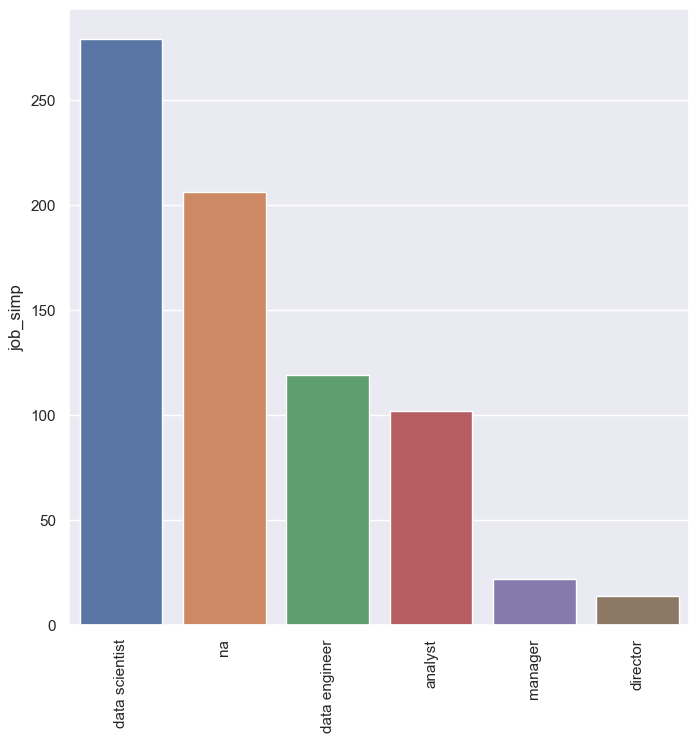

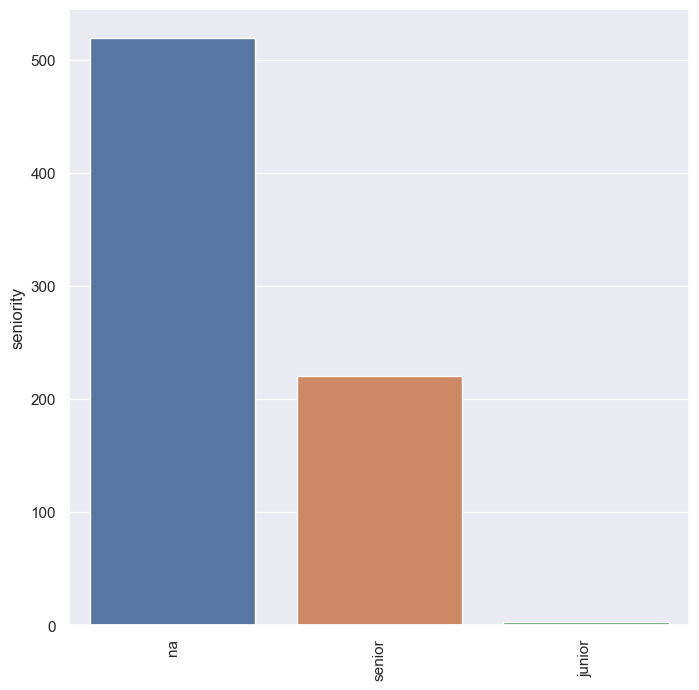

In [136]:

for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [135]:
import plotly.express as px

for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    fig = px.bar(cat_num, x=cat_num.index, y=cat_num)
    fig.show()

In [151]:
pd.pivot_table(df, index=["job_simp","seniority"], values="avg_salary").sort_values("avg_salary", ascending=False)

avg_salary
job_simp                  seniority            
director                  na         168.607143
machine learning engineer senior     142.071429
data scientist            senior     138.956522
data engineer             senior     124.689189
machine learning engineer na         119.133333
na                        senior     109.061404
data scientist            na         107.043011
                          junior     106.500000
data engineer             na          96.701220
manager                   na          84.022727
analyst                   senior      80.092593
na                        na          78.500000
analyst                   na          61.308219
                          junior      53.250000

In [162]:
pd.pivot_table(df , index="job_state" , values="avg_salary").sort_values("avg_salary",ascending=False)

,avg_salary
job_state,
CA,123.513158
IL,116.662500
DC,110.181818
MA,107.412621
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [163]:
pd.pivot_table(df , index=["job_state","job_city"] , values="avg_salary").sort_values("avg_salary",ascending=False)

avg_salary
job_state job_city                   
WA        Bellevue           184.5000
IL        Lake Forest        179.5000
CA        Mountain View      177.1875
          Novato             168.0000
          Burbank            164.0000
...                               ...
PA        West Reading        41.0000
MO        Kansas City         40.5000
AL        Alabaster           39.5000
CO        Longmont            29.5000
NY        Port Washington     15.5000

[200 rows x 1 columns]

In [181]:
# new pivot table for industry , sector , revenue , number of comp , hourly
# employer provided , python , spark ,hadoop , aws , scikit-learn , pytorch
# keras , google cloud , type of ownership , average salary

df_pivots = df[["Sector" , "Rating","Revenue", "comp_num","hourly","employer_pro", "python_des",
              "spark_des","hadoop_des","aws_des","scikit-learn_des","pytorch_des",
              "keras_des","google cloud_des", "Type of ownership","avg_salary"]]

In [182]:
for i in df_pivots.columns:
    if i == "avg_salary":
        continue
    
    print("Pivot table for " + i + " with average salary" )
    print(pd.pivot_table(df_pivots , index=i , values="avg_salary").sort_values("avg_salary",ascending=False))
    print("")

Pivot table for Sector with average salary
                                    avg_salary
Sector                                        
Media                               116.666667
-1                                  114.650000
Accounting & Legal                  113.500000
Information Technology              113.191667
Biotech & Pharmaceuticals           112.098214
Insurance                           105.942029
Real Estate                         104.750000
Mining & Metals                     104.000000
Telecommunications                  102.333333
Education                           100.739130
Consumer Services                    99.875000
Retail                               99.666667
Transportation & Logistics           99.312500
Aerospace & Defense                  99.060000
Finance                              98.011905
Business Services                    97.701031
Manufacturing                        84.044118
Agriculture & Forestry               80.500000
Oil, Gas, Energy 

In [185]:
pd.pivot_table(df_pivots , index="Revenue", columns="python_des", values="avg_salary" , aggfunc="count")

python_des,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [189]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

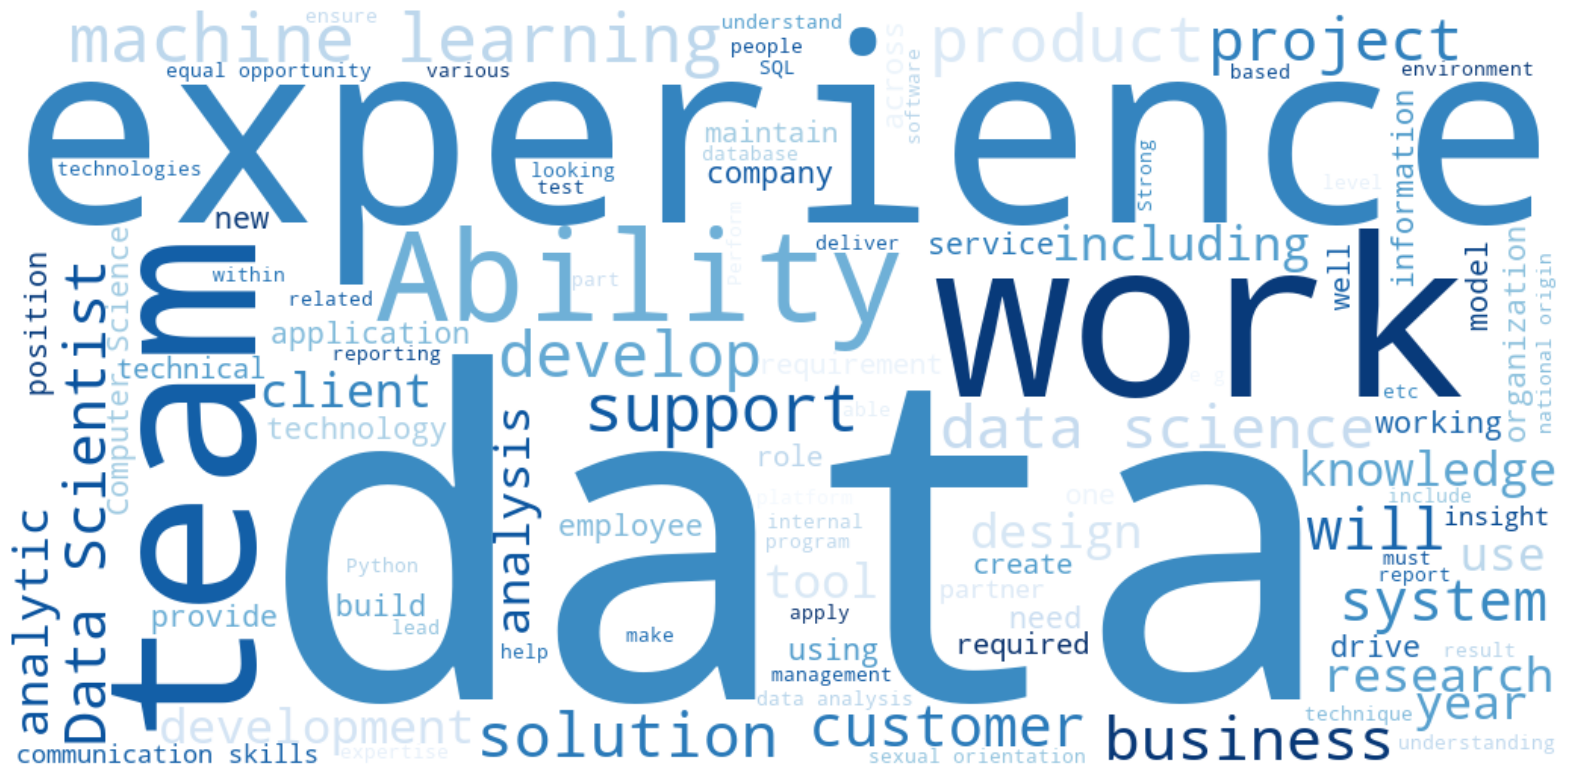

In [193]:

text = " ".join(item for item in df['Job Description'])
stopwords = set(STOPWORDS)
stopwords.update(["requirment", "include","of","by","will","make","must","use","people","able"])
wordcloud = WordCloud(background_color="white", 
                      max_words=100,
                      max_font_size=300,
                      width=1024, 
                      height=500,
                      colormap="Blues"
                     ).generate(text)

plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()